# Capstone project of Business Analytics with SQL and Python course by RMIT University

SuperFoods Max is a fictional grocery store chain.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superfoodsmax-rmit/SFM_merged.csv


In [2]:
# Load and preview the dataset

df = pd.read_csv('/kaggle/input/superfoodsmax-rmit/SFM_merged.csv')
df.head(5)

,customer_id,loyalty,household_type,age_band,basket_id,customer_id_1,product_id,transaction_date,price,days_since_first,product_id_1,department,brand,commodity,store
0,15855,Loyalist,Single male,19-24,57399,15855,10456166,2019-10-18 00:00:00.000000 UTC,2.00,16,10456166,Grocery,national,Frozen meat,374
1,15855,Loyalist,Single male,19-24,57399,15855,917767,2019-10-18 00:00:00.000000 UTC,7.69,16,917767,Grocery,national,Coffee,374
2,15855,Loyalist,Single male,19-24,57399,15855,840227,2019-10-18 00:00:00.000000 UTC,1.79,16,840227,Grocery,national,Facial tissues,374
3,15855,Loyalist,Single male,19-24,57399,15855,937573,2019-10-18 00:00:00.000000 UTC,2.50,16,937573,Grocery,national,Household cleaning needs,374
4,15855,Loyalist,Single male,19-24,57399,15855,1113792,2019-10-18 00:00:00.000000 UTC,0.79,16,1113792,Grocery,private,Pasta sauce,374


### First thing first, is the data clean?

The three separate tables have been joined using SQL. 

The merged table contains only year 2017 onwards. Values earlier than 2017 have been excluded as they are outdated.

Null values have been excluded.

In [3]:
# Display all columns and their values' format
df.dtypes

customer_id           int64
loyalty              object
household_type       object
age_band             object
basket_id             int64
customer_id_1         int64
product_id            int64
transaction_date     object
price               float64
days_since_first      int64
product_id_1          int64
department           object
brand                object
commodity            object
store                 int64
dtype: object

In [4]:
# Check for null values
df.isnull().sum()

customer_id         0
loyalty             0
household_type      0
age_band            0
basket_id           0
customer_id_1       0
product_id          0
transaction_date    0
price               0
days_since_first    0
product_id_1        0
department          0
brand               0
commodity           0
store               0
dtype: int64

## Current revenue trend

<Axes: title={'center': 'Yearly revenue trend'}, xlabel='year'>

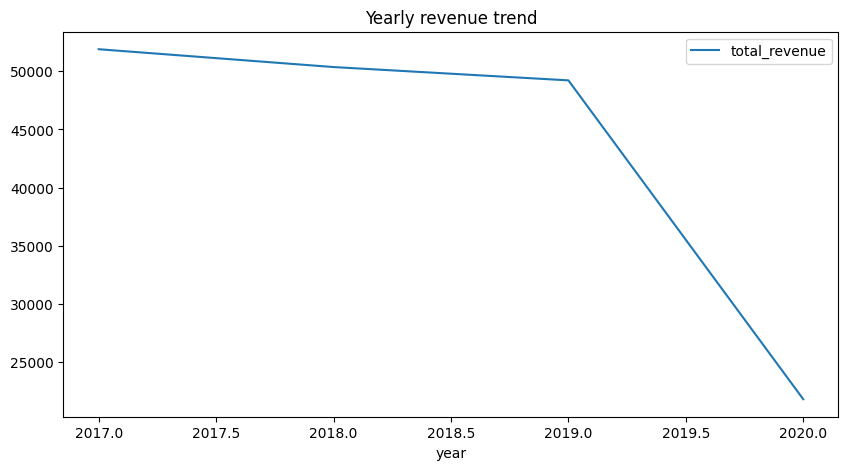

In [45]:
# Convert transaction_date into datetime
df.transaction_date = pd.to_datetime(df.transaction_date)
# Extract years only from transaction_date and store in a new column 'year'
df['year'] = df.transaction_date.dt.year
# Calculate the revenue for each year
yearly_revenue = df.groupby(['year']).agg(total_revenue=('price','sum'))
#print(yearly_revenue)
# Visualise yearly revenue
yearly_revenue.plot(figsize=(10,5), title= 'Yearly revenue trend')

Yearly revenue starts declining since 2017, but more so dramatically since 2019

COVID-19 seems to be an obvious culprit here. With lockdown in place world wide, coupled with the lack of online services by SFM, revenue took a plunge

       total_revenue
month               
1           14059.89
2           18365.08
3           17956.00
4           18677.76
5           15886.33
6           13628.49
7           10202.68
8           14481.18
9           12098.11
10          11193.81
11          11697.15
12          15033.97


<Axes: title={'center': 'Monthly revenue across the years'}, xlabel='month'>

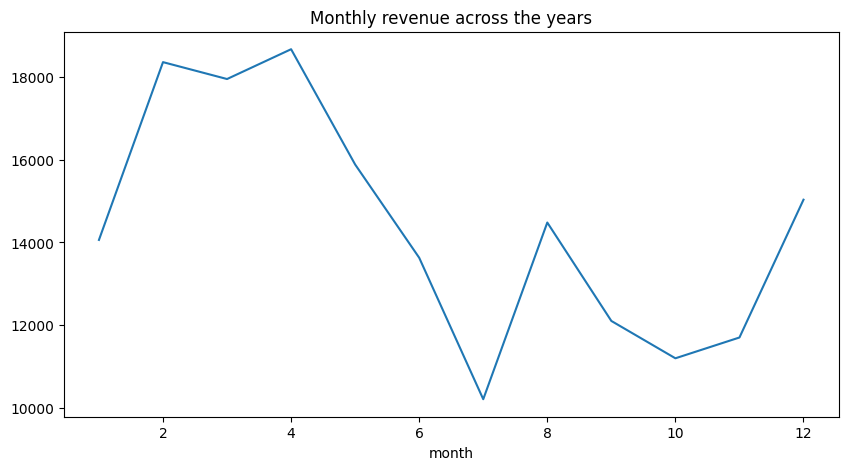

In [6]:
# Calculate monthly revenue across the year

# Extract months from transaction_time
df['month'] = df.transaction_date.dt.month

# Calculate revenue by month, store values in monthly_revenue
monthly_revenue = df.groupby(['month']).agg(total_revenue=('price', 'sum'))
print(monthly_revenue.head(12))

# Visualise monthly_revenue
monthly_revenue.plot(figsize=(10,5), legend=False, title='Monthly revenue across the years')

July is the least revenue-generating month, whilst April is the most.

It is likely that around February until April, where the weather is sunny and cool in Australia, customers might shop more as they get to do more activities (BBQ, gathering, school holidays)

## How many customers does SFM have?




In [7]:
# import matplotlib to use with viz
import matplotlib.pyplot as plt

Text(0, 0.5, '')

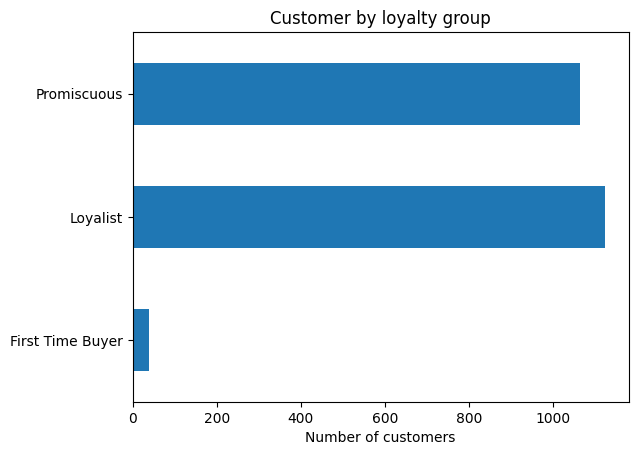

In [48]:
# Find out the number of customers for each loyalty group 
# Use pd.Series.nunique to count the unique number of customer_id
lcust = df.groupby(['loyalty']).agg(num_customers = ('customer_id', pd.Series.nunique))
#print(lcust)
# Visualise cust_l in a bar chart
lcust.plot(kind='barh', title='Customer by loyalty group', legend=False)
plt.xlabel('Number of customers')
plt.ylabel('')

                       num_customers
household_type                      
1 adult with kids                591
2 adults with kids               160
2 adults with no kids            699
Single female                    277
Single male                      498


Text(0, 0.5, '')

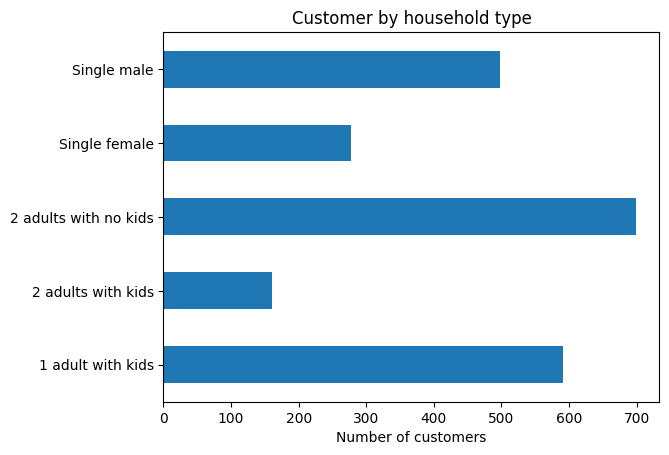

In [9]:
# Find out the number of customers for each household type
# Use pd.Series.nunique to count the unique number of customer_id
hcust = df.groupby(['household_type']).agg(num_customers = ('customer_id', pd.Series.nunique))
print(hcust)

# Visualise hcust in a bar chart
hcust.plot(kind='barh', title='Customer by household type', legend=False)
plt.xlabel('Number of customers')
plt.ylabel('')

          num_customers
age_band               
19-24              1633
25-34               557
35-44                35


Text(0, 0.5, '')

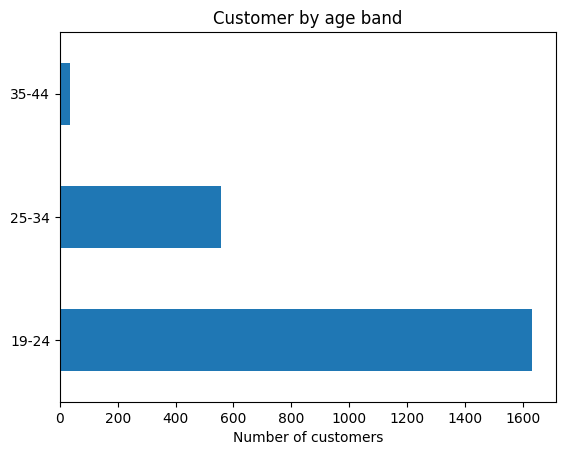

In [10]:
# Find out the number of customers for each age bracket
# Use pd.Series.nunique to count the unique number of customer_id
acust = df.groupby(['age_band']).agg(num_customers = ('customer_id', pd.Series.nunique))
print(acust)

# Visualise cust_l in a bar chart
acust.plot(kind='barh', title='Customer by age band', legend=False)
plt.xlabel('Number of customers')
plt.ylabel('')

In [32]:
import seaborn as sns

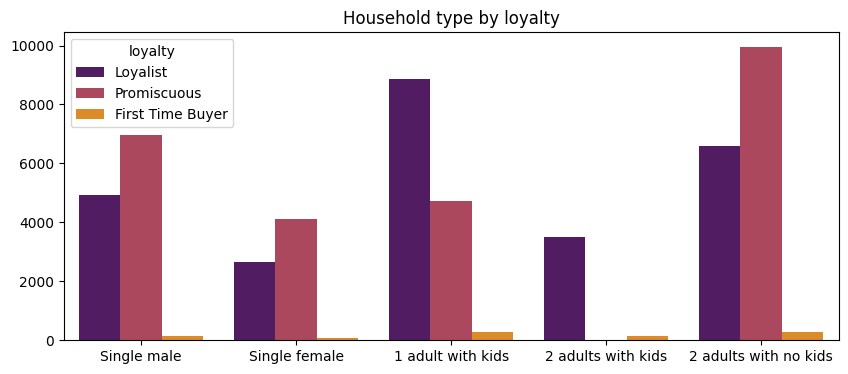

In [37]:
# Visualise proportion of customer loyalty in every household type
plt.figure(figsize=(10,4))
sns.countplot(x='household_type', data=df, hue='loyalty', palette='inferno')
plt.title('Household type by loyalty')
plt.xlabel('')
plt.ylabel('')
plt.show()

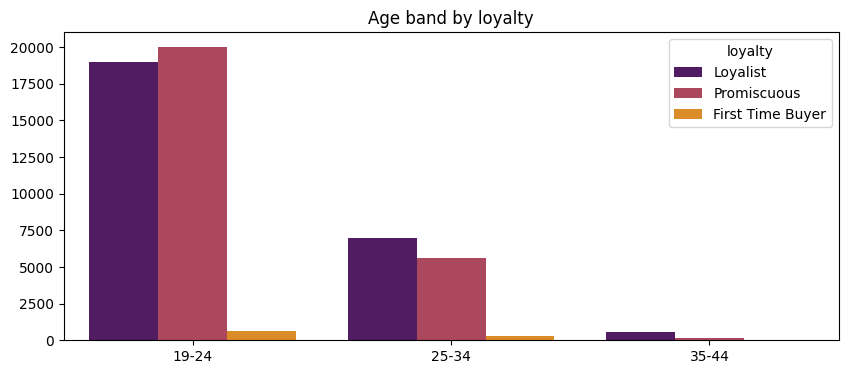

In [43]:
# Visualise proportion of customer loyalty in every age band
plt.figure(figsize=(10,4))
sns.countplot(x='age_band', data=df, hue='loyalty', palette='inferno')
plt.title('Age band by loyalty')
plt.xlabel('')
plt.ylabel('')
plt.show()

          num_customers
age_band               
19-24              1633
25-34               557
35-44                35


Text(0, 0.5, '')

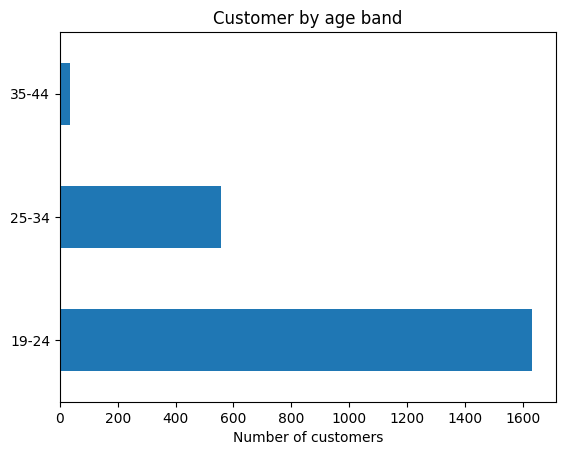

In [41]:
# Use pd.Series.nunique to count the unique number of customer_id
acust = df.groupby(['age_band']).agg(num_customers = ('customer_id', pd.Series.nunique))
print(acust)

# Visualise cust_l in a bar chart
acust.plot(kind='barh', title='Customer by age band', legend=False)
plt.xlabel('Number of customers')
plt.ylabel('')

## Top departments and their commodities

Text(0, 0.5, 'Department')

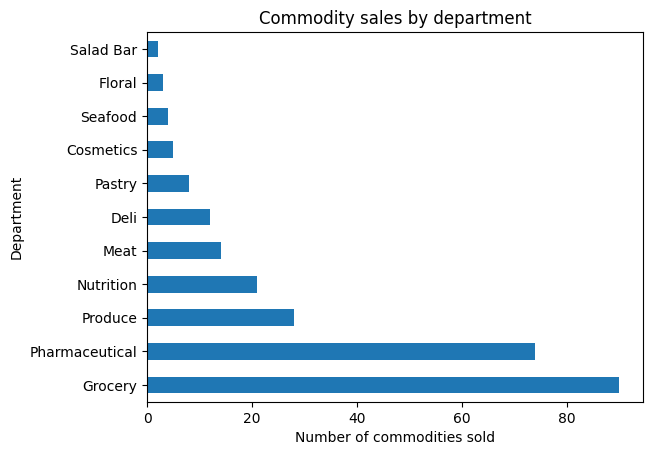

In [46]:
# Find the unique number of products sold in each department
dept_sales = df.groupby('department').agg(num_commodities=('commodity', pd.Series.nunique)).sort_values('num_commodities', ascending=False)
#print(dept_sales.head(10))
# Visualise dept_sales
dept_sales.plot(kind='barh', legend=False, title='Commodity sales by department')
plt.xlabel('Number of commodities sold')
plt.ylabel('Department')

Top 3 performing departments:
1. grocery
2. pharmaceutical
3. produce

<Axes: title={'center': 'Commodity sales by brand'}, xlabel='brand'>

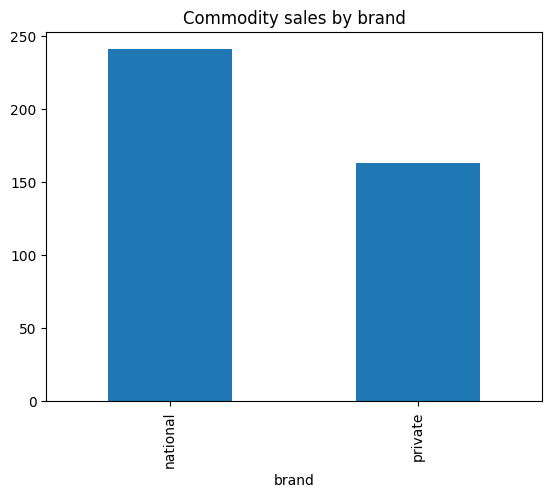

In [12]:
# Compare and visualise the commodity brands available in the supermarket
sales_brand = df.groupby('brand').agg(number_commodities=('commodity', pd.Series.nunique))
sales_brand.plot(kind='bar', legend=False, title='Commodity sales by brand')

The trend suggests that customers prefer to shop for national branded commodities

Text(0, 0.5, 'Household type')

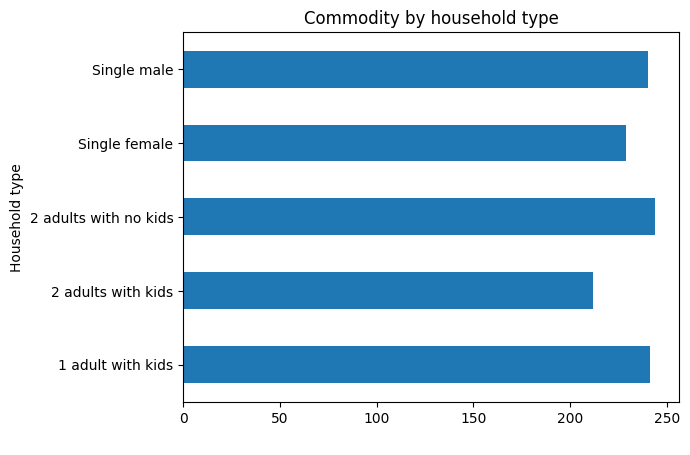

In [13]:
# Find out commodities sold for every household
household_sales = df.groupby(['household_type']).agg(number_commodities=('commodity', pd.Series.nunique))
household_sales.plot(kind='barh', legend=False, title='Commodity by household type')
plt.xlabel(' ')
plt.ylabel('Household type')

There is no significant difference between kid-free households



<Axes: title={'center': 'Commodity by age band'}, ylabel='age_band'>

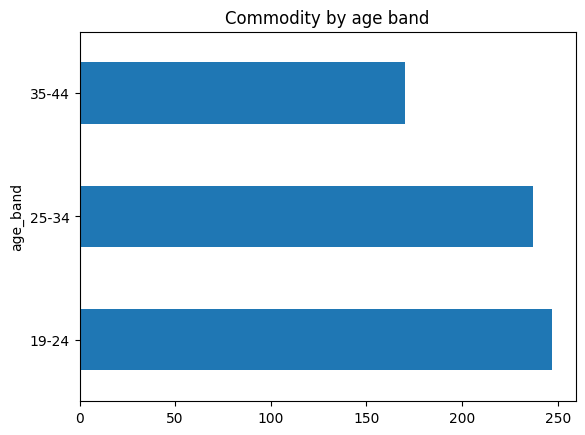

In [14]:
# Find out commodities sold per age_band
aband_sales = df.groupby(['age_band']).agg(number_commodities=('commodity', pd.Series.nunique))
aband_sales.plot(kind='barh', legend=False, title='Commodity by age band')

Commodities offered by SFM seems least popular amongst 35-44 year olds, and most popular to the younger group of 19-24 year old.

## Top commodities

In [47]:
# Check the revenue for the ten most popular commodities
t10_comm = df.groupby(['commodity']).agg(total_revenue=('price', 'sum')).sort_values('total_revenue', ascending=False)
#print(t10_comm.head(10))
# Interactive viz for top 10 commodities
t10 = t10_comm.head(10)
go.Figure(
    data = go.Bar(x=t10.index, y=t10['total_revenue']),
    layout = go.Layout(
        title='Top 10 commodities',
        yaxis=dict(
            title='Revenue'
        )
    )
).show(renderer='iframe')

In [16]:
# Check the revenue for the ten least popular commodities
b10_comm = df.groupby(['commodity']).agg(total_revenue=('price', 'sum')).sort_values('total_revenue', ascending=True)
b10_comm.head(10)

# Interactive viz for bottom 10 commodities
#b10 = b10_comm.head(10)
#go.Figure(
#    data = go.Bar(x=b10.index, y=b10['total_revenue']),
#    layout = go.Layout(
#        title='Top 10 commodities',
#        yaxis=dict(
#            title='Revenue'
#        )
#    )
#).show(renderer='iframe')

,total_revenue
commodity,
Bottle deposits,0.10
Deli supplies,5.67
Natural hbc,7.18
Continuities,9.98
Sewing,11.10
Overnight photofinishing,15.08
Canned milk,16.31
Frozen drinks,17.87
Fireworks,19.88


The highest commodity in each household type is beef.

Commodities consistently purchased in each household are beef and cheese.

Now let's try and see if these patterns are also consistent across loyalty types:

In [17]:
# Top 5 commodities across loyalty groups
lcomm = df.groupby(['loyalty', 'commodity']).agg(total_revenue=('price', 'sum')).reset_index()

t5lcomm = pd.concat(
    [lcomm[lcomm.loyalty==l].sort_values('total_revenue', ascending=False).head(5) for l in lcomm.loyalty.unique()])
print(t5lcomm.head())

# Visualise Top 5 commodities across loyalty groups
data = []
for d in t5lcomm.commodity.unique():
    tmpl = t5lcomm[t5lcomm.commodity==d].groupby(['loyalty']).agg(revenue=('total_revenue', sum)).reset_index()
    data.append(go.Bar(x=tmpl.loyalty, y=tmpl.revenue, name=d))

go.Figure(
    data = data,
    layout = go.Layout(
        title = 'Top commodities per loyalty group',
        yaxis = dict(
            title = 'Revenue'
        )
    )
).show(renderer='iframe')

              loyalty       commodity  total_revenue
15   First Time Buyer            Beef         183.86
76   First Time Buyer     Frozen meat          96.20
143  First Time Buyer  Seafood-frozen          86.98
102  First Time Buyer      Lunch meat          84.25
36   First Time Buyer         Chicken          64.57


/tmp/ipykernel_33/1264453196.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1264453196.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1264453196.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1264453196.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will

Bingo! Beef remains the most popular purchase regardless of loyalty type. Both beef and cheese were consistently purchased too.

There seems to be a new pattern: lunch meat and chicken were only purchased by first-time customers, but not loyalist nor promiscuous..
Does this suggest customers' dissatisfaction for these commodities? 

In [18]:
# Top 5 commodities in each household type
hcomm = df.groupby(['household_type', 'commodity']).agg(total_revenue=('price', 'sum')).reset_index()
t5hcomm = pd.concat(
    [hcomm[hcomm.household_type==hh].sort_values('total_revenue', ascending=False).head(5) for hh in hcomm.household_type.unique()])
print(t5hcomm.head())

# Visualise top 5 household commodity
# Initiate loop with an empty series
data = []
for d in t5hcomm.commodity.unique():
    tmpl = t5hcomm[t5hcomm.commodity==d].groupby(['household_type']).agg(revenue=('total_revenue', sum)).reset_index()
    data.append(go.Bar(x=tmpl.household_type, y=tmpl.revenue, name=d))

go.Figure(
    data = data,
    layout = go.Layout(
        title = 'Top commodities per household',
        yaxis = dict(
            title = 'Revenue'
        )
    )
).show(renderer='iframe')

        household_type    commodity  total_revenue
19   1 adult with kids         Beef        3141.63
45   1 adult with kids       Cheese        1209.30
106  1 adult with kids  Frozen meat        1142.23
63   1 adult with kids   Deli meats        1119.69
193  1 adult with kids        Salad         991.86


/tmp/ipykernel_33/1553362058.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1553362058.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1553362058.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/1553362058.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will

In [19]:
# Identify top 10 commodities across age bands
acomm = df.groupby(['age_band', 'commodity']).agg(total_revenue=('price', 'sum')).reset_index()
t10acomm = pd.concat(
    [acomm[acomm.age_band == a].sort_values('total_revenue', ascending=False).head(10) for a in acomm.age_band.unique()]).reset_index(drop=True)
print(t10acomm.head(10))

# Visualise top 10 commodities across age bands
data = []
for d in t10acomm.commodity.unique():
    tmpl = t10acomm[t10acomm.commodity==d].groupby(['age_band']).agg(revenue=('total_revenue', sum)).reset_index()
    data.append(go.Bar(x=tmpl.age_band, y=tmpl.revenue, name=d))
go.Figure(
    data = data,
    layout = go.Layout(
        title='Top commodities per age bracket',
        yaxis=dict(
            title='Revenue'
        )
    )
).show(renderer='iframe')

  age_band       commodity  total_revenue
0    19-24            Beef        9134.00
1    19-24  Seafood-frozen        4139.20
2    19-24          Cheese        3260.77
3    19-24     Frozen meat        3192.62
4    19-24      Deli meats        3015.74
5    19-24      Lunch meat        2852.50
6    19-24           Salad        2825.63
7    19-24      Cigarettes        2508.59
8    19-24            Pork        2286.07
9    19-24           Candy        2250.02


/tmp/ipykernel_33/2267427707.py:10: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/2267427707.py:10: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/2267427707.py:10: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_33/2267427707.py:10: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will

Whilst beef remains the most preferred commodity across, there are a few new observations in shopping habits when we consider customer age:

1. Younger customers tend to shop more. SFM's products seem to attract younger people compared to older ones.
2. Younger customers consume beef, seafood-frozen, cheese, frozen meat and deli meats significantly more than any age groups.
3. Customers between 19-34 y/o purchase seafood-frozen, cheese and frozen meat significantly more compare to >35 y/o.

## Top commodity purchasing trends: Beef and frozen seafood

<Axes: title={'center': 'Beef yearly revenue'}, xlabel='year'>

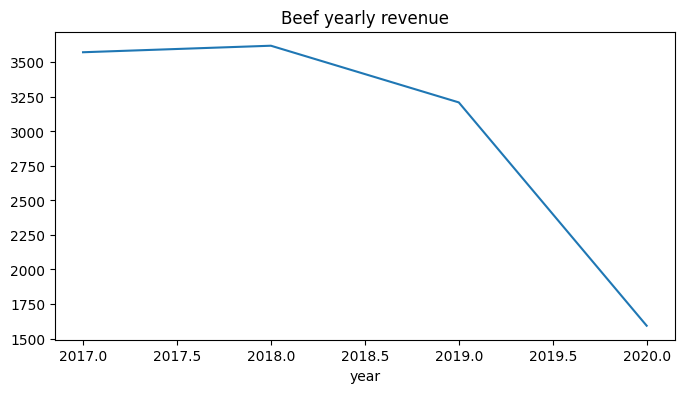

In [20]:
# Beef purchase trend

# Create dataframe with only beef
beef = df[df.commodity=='Beef'].copy()
beef.transaction_date = pd.to_datetime(beef.transaction_date, format = '%y-%m-%d')
beef['year'] = beef.transaction_date.dt.year
beef.groupby(['year']).agg(total_revenue=('price', 'sum')).plot(figsize=(8,4), title='Beef yearly revenue', legend=False)

Consistent with the overall revenue trend, beef revenue also showed sharp decline from 2019 onwards.

But is this trend solely caused by COVID lockdown?

Is it possible that beef-eaters might have shifted to other meat products, or perhaps ditched it completely?

Let's see what our non-beef eaters buy:

            total_revenue
year month               
2017 1             984.76
     2            1367.30
     3            1244.27
     4            1071.92
     5            1026.30
     6            1013.75
     7             752.65
     8            1287.99
     9            1025.41
     10           1087.50
     11            844.75
     12            978.77
2018 1             754.34
     2            1436.75
     3            1289.51
     4             913.89
     5             972.13
     6             835.77
     7             944.62
     8            1134.75
     9             795.30
     10            927.37
     11           1121.06
     12           1180.40
2019 1             809.01
     2             844.06
     3             763.07
     4            1278.70
     5            1260.75
     6            1386.32
     7             711.57
     8            1057.62
     9            1007.79
     10            820.78
     11            896.29
     12           1402.60
2020 1      

<Axes: xlabel='year,month'>

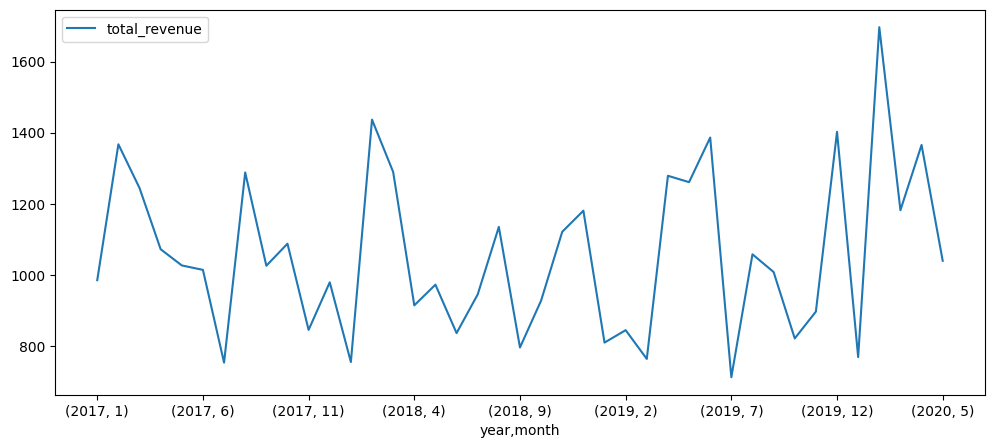

In [21]:
# Create dataframe that contains all meat products
meat = df[df.commodity.str.lower().str.contains('meat|beef|chicken|seafood|pork')].copy()
# Whilst we're at this, let's quickly look at the meat revenue 
meat.transaction_date = pd.to_datetime(meat.transaction_date, format='%y-%m-%d')
meat['year'] = meat.transaction_date.dt.year
meat['month'] = meat.transaction_date.dt.month
meat_rev = meat.groupby(['year', 'month']).agg(total_revenue=('price', 'sum'))
print(meat_rev)
meat_rev.plot(figsize=(12,5)) #Plot meat revenue trend if desired

In [22]:
# Create dataframe that excludes beef from customers' shopping
nobeef = df[~df.basket_id.isin(df[df.commodity=='Beef'].basket_id.unique())]
nobeef.groupby('commodity').agg(total_revenue=('price','sum')).sort_values('total_revenue', ascending=False).head(10)

,total_revenue
commodity,
Seafood-frozen,2545.60
Frozen meat,1993.92
Cheese,1921.12
Lunch meat,1712.32
Deli meats,1708.74
Salad,1657.82
Pork,1592.58
Candy,1567.40
Chicken,1366.98


There seems to be a lot of meat alternatives for non-beef eaters, seafood-frozen being the most popular.

<Axes: title={'center': 'Seafood-frozen yearly revenue'}, xlabel='year'>

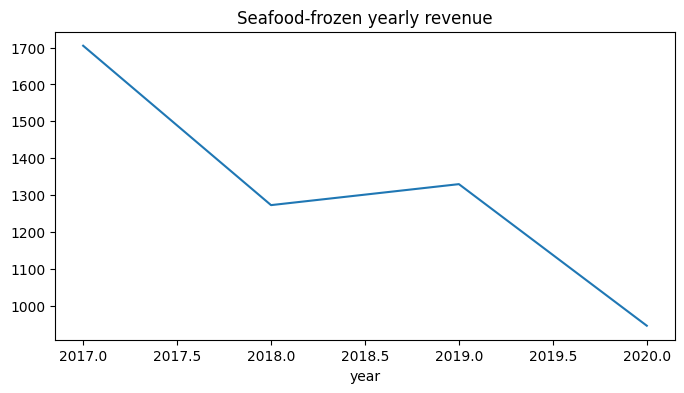

In [23]:
# Create seafood-frozen trend
# Create dataframe with only fsea
fsea = df[df.commodity=='Seafood-frozen'].copy()
fsea.transaction_date = pd.to_datetime(fsea.transaction_date, format = '%y-%m-%d')
fsea['year'] = fsea.transaction_date.dt.year
fsea.groupby(['year']).agg(total_revenue=('price', 'sum')).plot(figsize=(8,4), title='Seafood-frozen yearly revenue', legend=False)


Frozen seafood revenue showed a sharp decline from 2019 onwards.

2018 saw a slight dip in its revenue.



The third highest ranked commodity is the cheese, which is the only non-meat protein in top 3.

Cheese remains relatively high in the ranking, as well as across demographics. 

Let's see what else do our cheese eaters commonly purchase together:

<Axes: title={'center': 'Cheese yearly revenue'}, xlabel='year'>

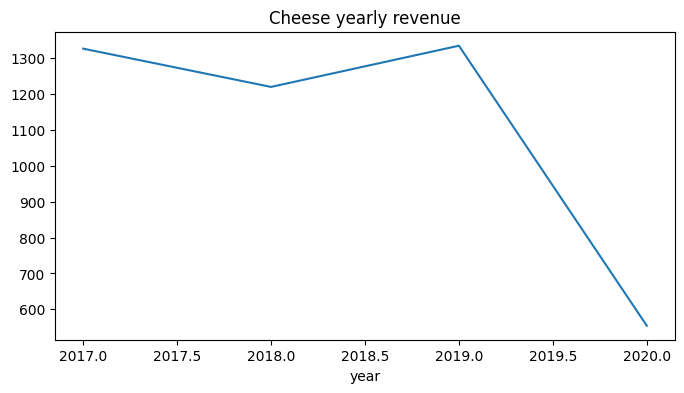

In [24]:
# Create a cheese dataframe
cheese = df[df.commodity=='Cheese'].copy()
cheese.transaction_date = pd.to_datetime(cheese.transaction_date, format = '%y-%m-%d')
cheese['year'] = cheese.transaction_date.dt.year
cheese.groupby(['year']).agg(total_revenue=('price', 'sum')).plot(figsize=(8,4), title='Cheese yearly revenue', legend=False)

It looks like cheese revenue also declined dramatically since 2019.

This means all SuperFoodsMax top 3 commodities declined in revenue - this could be significant enough to adversely affect their total revenue.

            total_revenue
year month               
2017 1             163.83
     2             173.82
     3             272.51
     4             295.59
     5             158.21
     6             227.36
     7             212.13
     8             315.45
     9             195.49
     10            163.96
     11            178.64
     12            293.62
2018 1             142.48
     2             208.37
     3             329.77
     4             149.10
     5             169.07
     6             236.45
     7             204.65
     8             229.24
     9             189.38
     10            118.82
     11            243.77
     12            271.08
2019 1             170.62
     2             171.65
     3             338.36
     4             167.82
     5             152.82
     6             210.61
     7             163.60
     8             238.22
     9             194.27
     10            139.38
     11            171.83
     12            332.42
2020 1      

<Axes: xlabel='year,month'>

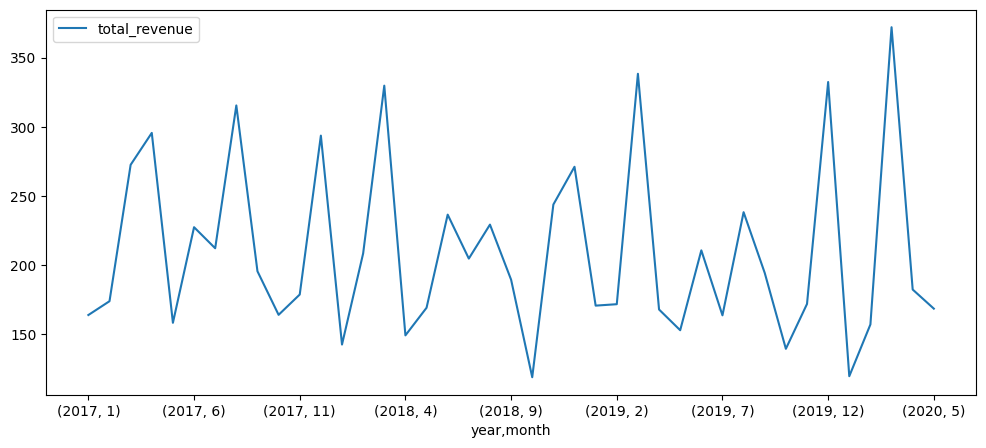

In [25]:
# Create dataframe that contains all dairy products
dairy = df[df.commodity.str.lower().str.contains('cheese|milk|yoghurt|cream|butter')].copy()
# Whilst we're at this, let's quickly look at the meat revenue 
dairy.transaction_date = pd.to_datetime(dairy.transaction_date, format='%y-%m-%d')
dairy['year'] = dairy.transaction_date.dt.year
dairy['month'] = dairy.transaction_date.dt.month
dairy_rev = dairy.groupby(['year', 'month']).agg(total_revenue=('price', 'sum'))
print(dairy_rev)
dairy_rev.plot(figsize=(12,5)) #Plot dairy revenue trend if desired

In [26]:
# Create a dataframe for cheese lovers to see what else they purchase
#chlover = df[df.basket_id.isin(df[df.commodity == 'Cheese'].basket_id.unique())]
#chlover.groupby(['commodity']).agg(total_revenue=('price', 'sum')).sort_values('total_revenue', ascending=False).head(10)

In [27]:
# Create dataframe that excludes cheese from customers' shopping
nocheese = df[~df.basket_id.isin(df[df.commodity=='Cheese'].basket_id.unique())]
nocheese.groupby('commodity').agg(total_revenue=('price','sum')).sort_values('total_revenue', ascending=False).head(10)

,total_revenue
commodity,
Beef,6543.75
Seafood-frozen,3046.66
Frozen meat,2208.44
Salad,2132.82
Deli meats,2116.60
Lunch meat,2089.31
Cigarettes,1732.07
Chicken,1715.54
Candy,1648.48


When comparing the shopping habit between beef-eaters, seafood-lovers and even non-meat eaters, there isn't any obvious difference in terms of preference.

This suggests that SFM provides a good range of grocery commodities for their customers, and that they are able to cater to different dietary preferences across different household types.



## Some statistical summaries


In [28]:
# Let's find the average, median and total amount spent on each commodity
commstats = df.groupby(['commodity', 'basket_id']).agg(total_revenue=('price', 'sum')).reset_index()
commstats.groupby('commodity').agg(
    average=('total_revenue','mean'),
    median=('total_revenue', 'median'),
    total=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
).sort_values('average', ascending=False).head(10)

,average,median,total,num_baskets
commodity,,,,
Prepaid wireless accessories,32.727273,10.000,360.00,11
Coupon/misc items,23.130400,39.990,578.26,25
Infant formula,15.232745,9.980,776.87,51
In-store photofinishing,15.088800,13.920,377.22,25
Audio/video products,14.573333,9.990,349.76,24
Personal care appliances,14.136667,15.990,127.23,9
Eye and ear care products,13.825714,6.190,483.90,35
Sports memorablilia,13.240000,13.240,79.44,6
Portable electric appliances,13.058750,12.185,104.47,8


In [29]:
# Let's find the average, median and total amount spent by loyalty
lstats = df.groupby(['loyalty', 'basket_id']).agg(total_revenue=('price', 'sum')).reset_index()
lstats.groupby('loyalty').agg(
    average=('total_revenue','mean'),
    median=('total_revenue', 'median'),
    total=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
).sort_values('average', ascending=False)

,average,median,total,num_baskets
loyalty,,,,
Loyalist,72.638461,70.360,86367.13,1189
Promiscuous,72.524534,70.535,83983.41,1158
First Time Buyer,69.759762,73.380,2929.91,42


Loyalty group summary:

1. All types of loyalties spend almost similar amount on average respective to their categories
2. This suggests that there is somewhat similar potential revenue in every customer trip (people shop a similar amount every time they go shopping)
3. SFM's management desire to convert more non-loyalists into one is a heading in the right direction

In [30]:
# Let's find the average, median and total amount spent by age_band
agestats = df.groupby(['age_band', 'basket_id']).agg(total_revenue=('price', 'sum')).reset_index()
agestats.groupby('age_band').agg(
    average=('total_revenue','mean'),
    median=('total_revenue', 'median'),
    total=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
).sort_values('average', ascending=False)

,average,median,total,num_baskets
age_band,,,,
19-24,73.587761,71.420,129514.46,1760
25-34,69.771551,68.730,41374.53,593
35-44,66.429444,57.135,2391.46,36


Age band summary:

1. 19-24 customers spend the most on average
2. Across age bands, average spending deviate by small margin
3. All customers of any age band have somewhat similar spending potential

In [31]:
# Let's find the average, median and total amount spent by household_type
hstats = df.groupby(['household_type', 'basket_id']).agg(total_revenue=('price', 'sum')).reset_index()
hstats.groupby('household_type').agg(
    average=('total_revenue','mean'),
    median=('total_revenue', 'median'),
    total=('total_revenue', 'sum'),
    num_baskets=('basket_id', 'count')
).sort_values('average', ascending=False)

,average,median,total,num_baskets
household_type,,,,
Single female,73.857888,72.550,22378.94,303
Single male,73.174323,70.860,39440.96,539
2 adults with no kids,72.508360,70.995,54816.32,756
1 adult with kids,72.095474,69.640,44915.48,623
2 adults with kids,69.813988,69.075,11728.75,168


Household type summary:

1. Kid-free households spend the most.
2. Single-parents and childless couples spend almost similarly.
3. Couples with children spend the least.

## Answering SFM's business question

The management believes that revenue has been stagnating and would like to increase its revenue by 5% within the next 2 years. They believed that the focus should be on rectifying the high churning rate (high rate of customers not returning for service).

We already analysed their current revenue. Let's recap what we already know:
1. Revenue has been steadily declining since 2017, and dramatically dropped since 2019 (we suspect COVID lockdown as the culprit)
2. Commodities that consistently contributed to high revenue are beef and cheese.
3. 10 commodities ranked the least popular only amounted less than 30 dollars on average. But they all look like miscellaneous, seasonal items.
4. Their customers, regardless of loyalty, age or household type, demonstrate almost similar revenue potential. Their average spending every time they visit SFM is about 70 dollars.
5. Promiscuous customers are high spenders - almost as high as loyalists. Their shopping habits are quite similar too.

### Conclusion:
The management's decision to focus on converting non-loyalists into one is a solid step in the right direction.

### Recommendations:
1. Younger customers: improve online shopping experience to retain and/or attract more
2. Broader household: make shopping easier (provide drive through, interesting membership perks, etc.)